In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')
train=pd.read_csv('C:\\Users\\deept\\OneDrive\\Desktop\\Prodigy\\Task 2\\train.csv')
test=pd.read_csv('C:\\Users\\deept\\OneDrive\\Desktop\\Prodigy\\Task 2\\test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_shape = train.shape
print(train_shape)


(891, 12)


In [9]:
test.shape


(418, 11)

In [10]:
#checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [23]:
result = train.groupby('Survived').sum()
print(result)

          PassengerId  Pclass  \
Survived                        
0              245412    1390   
1              151974     667   

                                                       Name  \
Survived                                                      
0         Braund, Mr. Owen HarrisAllen, Mr. William Henr...   
1         Cumings, Mrs. John Bradley (Florence Briggs Th...   

                                                        Sex       Age  SibSp  \
Survived                                                                       
0         malemalemalemalemalemalemalefemalemalefemalema...  12985.50    304   
1         femalefemalefemalefemalefemalefemalefemalefema...   8219.67    162   

          Parch                                             Ticket  \
Survived                                                             
0           181  A/5 2117137345033087717463349909A/5. 215134708...   
1           159  PC 17599STON/O2. 3101282113803347742237736PP 9...   

            

In [25]:
# Select only numeric columns for correlation calculation
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print(correlation_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [26]:
numeric_columns.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [28]:
male=len(train[train['Sex']=='male'])
print("No of male passengers:",male)

No of male passengers: 577


In [29]:
female=len(train[train['Sex']=='female'])
print("No of male passengers:",female)

No of male passengers: 314


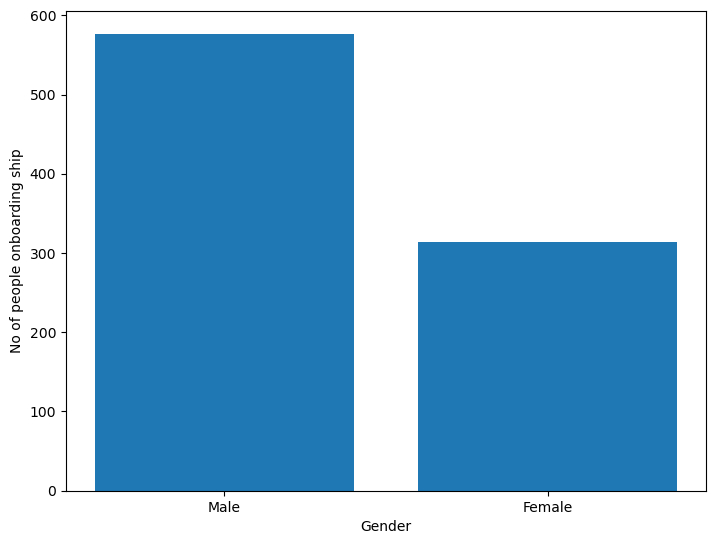

In [34]:
#plotting
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
index=[577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [35]:
alive=len(train[train['Survived']==1])
dead=len(train[train['Survived']==0])

In [36]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


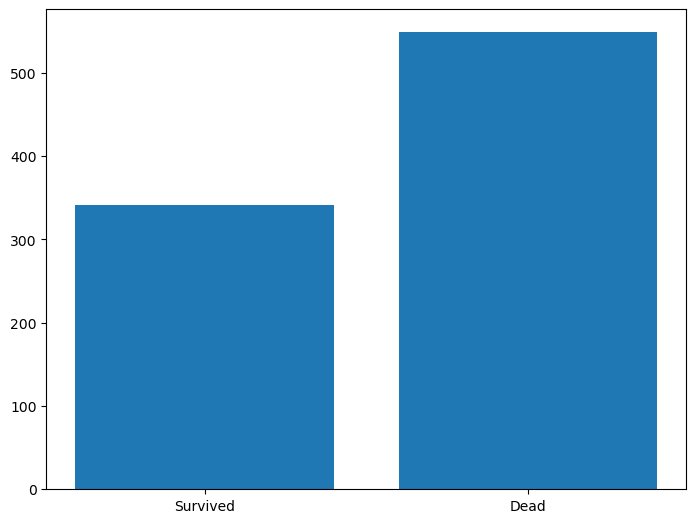

In [37]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
status=['Survived','Dead']
ind=(alive,dead)
ax.bar(status,ind)
plt.show()

Text(0.5, 1.0, 'Bar graph of people who survived')

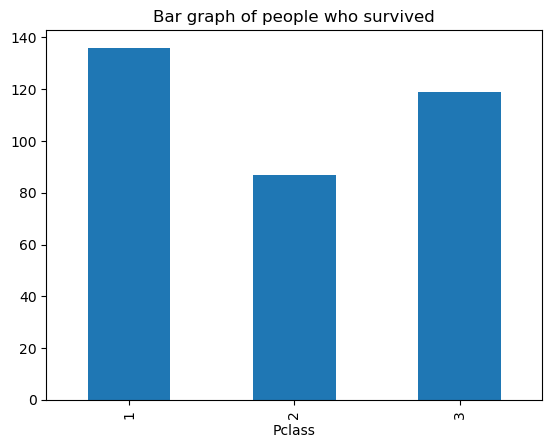

In [38]:
plt.figure(1)
train.loc[train['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people who survived')

Text(0.5, 1.0, 'Bar graph of people who are dead')

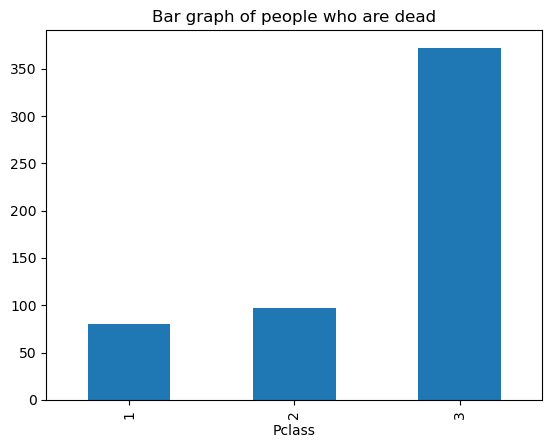

In [39]:
plt.figure()
train.loc[train['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people who are dead')

([<matplotlib.axis.XTick at 0x24235197210>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

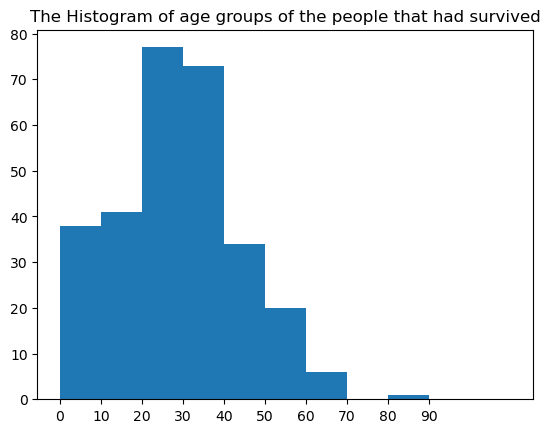

In [46]:
plt.figure()
age=train.loc[train['Survived']==1,'Age']
plt.title('The Histogram of age groups of the people that had survived')
plt.hist(age,np.arange(0,120,10))
plt.xticks(np.arange(0,100,10))


([<matplotlib.axis.XTick at 0x242379c9950>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

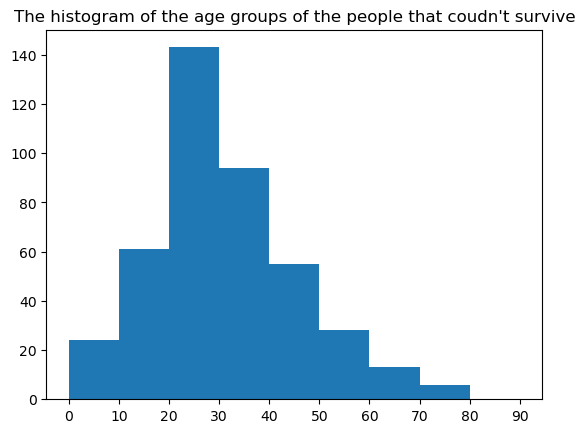

In [47]:
plt.figure()
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [48]:
train[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [49]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [50]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [51]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


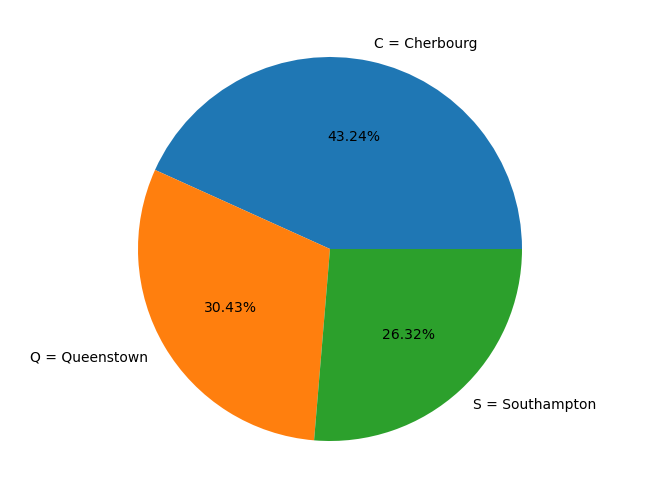

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [55]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [56]:
#dropping useless columns from both training and testing data
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [57]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [59]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=train[column_train]
Y=train['Survived']


In [62]:

X.isnull().sum()


Age         177
Pclass        0
SibSp         0
Parch         0
Fare          0
Sex           0
Embarked      2
dtype: int64

In [63]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()


0

In [65]:
X['Embarked']=train['Embarked'].fillna(method='pad')

X['Embarked'].isnull().sum()

0

In [66]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [67]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

Based on the EDA, we can observe the following:

* The dataset contains categorical variables like 'Sex', 'Embarked', and 'Pclass', as well as continuous variables like 'Age' and 'Fare'.
* There are missing values in the 'Age' column, which we filled with the median age.
* The correlation matrix shows a positive correlation between 'Pclass' and 'Survived', indicating that passengers in higher classes had a higher survival rate.
* There is a clear pattern in the survival rate by passenger class, with higher survival rates for passengers in the upper classes.
* The survival rate is higher for children and lower for adults and elderly passengers.
* Female passengers had a significantly higher survival rate compared to male passengers.